# MNIST Data Set - Basic Approach

## MNIST Data Set : 
- It is a collection of arrays representing hand written digits (0-9) using pixels.
- We'll see how we can user TensorFlow to help classify what number is written simply by training on the array values.
- Here we will use classical approach of using TF. In next series of notes we will use much simple estimator model.
- Estimator model is much easier to use with sklearn where you create some sort of input function and then train, predict it.
- First manual then input based.

### Get the MNIST Data

**Alternative sources of the data just in case:**

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
import warnings
warnings.filterwarnings("ignore")

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist) # Shows that data type is specialised TF dataset

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images # Series of numpy arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.images.shape # Means we have 55k images with 784 pixels per image.
# In a while we will see how to reshape these images, so that we can visualise these.

(55000, 784)

In [9]:
# To confirm how many images we have in train set
mnist.train.num_examples
# A lot of images to train on. Good for Neural Network as it will need a lot of data.

55000

In [10]:
# To confirm how many images we have in test set
mnist.test.num_examples

10000

### Visualizing the Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
# To see stuff inside notebook

In [13]:
mnist.train.images[1].shape 
# 784 entries, which we need to reshape into 28 by 28 pixels as this is the actual shape of MNIST iamges. 28*28 = 784

(784,)

In [14]:
# Reshape the image
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

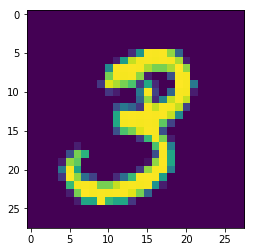

In [15]:
plt.imshow(mnist.train.images[1].reshape(28,28))
# Representing hand written digit using some sort of pixel value. 0 would be darkest shade and 1 is lightest shade.
# In array also for 28x28 shape 0 is present at corners that is wherever matrix value is (0,28) (0,0) (28,0) etc. and close
# to 1 i.e. 0.9-ish values for bright spots to show a yellow pixel where it is not dark and digit is there.

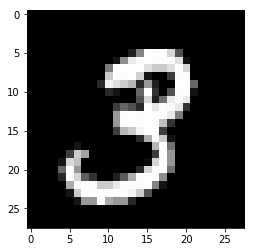

In [16]:
# You can also visualise these numbers in grayscale using cmap
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray') # Most of the online tutorials use this method.

NOTE : We won't pass the image as 28x28 array for neural network. Instead we will pass it in as 784x1 shape which it was originally. Essentially just as a vector of numbers.

Let's try to play around and try to visualise the values in a 784,1 vector reshape.
What we get is a really long vector and we are note able to see anything because those are single values and most of them are zero as well.

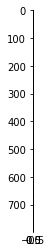

In [17]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray')

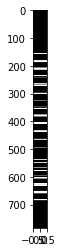

In [18]:
# We can change the aspect to get more visibility
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)
# Here we stretch out the vector, specifically bars representing the colors so we have better visualisation. We will pass this
# to neural network as vector of 784 pixels.

## Create the Model
- Trying to classify numbers simply based on the value of their arrays

In [19]:
x = tf.placeholder(tf.float32,shape=[None,784]) # Creating placeholder for taking 32bit float
# Placeholder takes in datatype and shape it expects
# We will pass images as batches, as 55k images are too many images at once, and we have to decide optimal batch size,
# which we can do later on. We experiment with size of batches and keep None as temporary placeholder for now.
# Above code sends certain batch amount of images which we don't know in shape of 784 pixels at a time.

In [21]:
import warnings
warnings.filterwarnings("ignore")
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10])) # Defining weight and 10 target labels and 784 pixels.

In [22]:
b = tf.Variable(tf.zeros([10])) # We are just adding the bias, as we have to add one per class

Recall, in basics we talked about in a Neural Network, In perceptron we have x times some weight + a bias. In order for matrix math to work out we need to say shape of weight be (784,10) and x right now is (some_batch,784). Again (m x n) (n x p) matrix multiplication rule.

In [23]:
# Create the Graph
y = tf.matmul(x,W) + b # Matrix multiply of x,W and adding the bias.

## Loss and Optimizer

In [24]:
y_true = tf.placeholder(tf.float32,[None,10]) # Shows true label would a label for the batch out of 10 different values
# In y_true we will be passing in and compare actual true labels. y above is the label we will be predicting.

Previously, we did 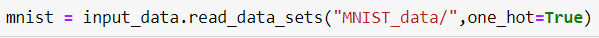
Setting one_hot = True, what this does is that actual target or the label is one_hot encoded.

In [28]:
mnist.train.labels[0] # This is what one_hot encoding looks like. Each of these index positions stands for number it represents.
# We see above that at according to one_hot this is 7. The entire label is vector of 10 digits here.
# That is the reason we say shape of y_true will be (some_batch_size (NONE for now),10)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

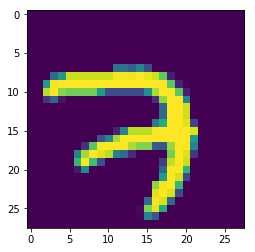

In [30]:
plt.imshow(mnist.train.images[0].reshape(28,28)) # Plotting the same image gives us a hand written 7, as 1 is at index 8.

# Cross Entropy
Cross entropy will take care of mathematics of running the gradient descent optimizer and minimizing the error.

In [32]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))
# We pass in tf.nn.softmax_cross_entropy_with_logits_v2, v2 is the improved version
# Tries to reduce the error between y_true and what we predict.

In [33]:
# To optimize we use GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
# Here we can tweak with learning rate to address situations of overshooting and slow descend towards minimum point.
# Also, lower the learning rate, slower it will learn but usually that increases the accuracy at the cost of training time.
# Faster the learning rate, less time it takes to train neural network but it may be less accurate.

In [34]:
train = optimizer.minimize(cross_entropy)
# Opimizer is the method how we try to reduce the error, and cross entropy is how we actually define the eror.
# Train is where we say, grab that optimizer and minimize the cross_entropy error.

### Create Session

In [35]:
init = tf.global_variables_initializer() # Initializes all the variables, call this while running the session

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000): # This is where we play with values, how many times we want to feed the batches in
        
        batch_x , batch_y = mnist.train.next_batch(100) # Tuple unpacking here, MNIST has built-in method for training batches
        # Above grabs a batch of 100 numbers and grab their x and y target labels.
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y}) # feed_dict is actual values we are passing in for x and y
        # Passing in batches into the placeholders, with a dictionary.
    
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    # What above does is asks where the two are equal between prediction and actual.
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32)) # Calculate accuracy by calling reduce_mean, cast on matches
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    # Printing total accuracy by using accuracy formula and passing the feed dictionary but on test set here.

0.9172


- The code above is really complicated, in next notebook we will learn about TF Estimator object, which makes this process really simpler.
- Also it looks a lot like SciKit-Learn. But do this so that you have an idea of what is going on in the background, while using estimator. 
- Estimator does all the heavy-lifting on our behalf.

#  Up Next :
- Move toward on how to use tensorflow estimator. 
- Working with more realistic datasets, loading in csv files and using TF's estimator object to quickly run and create models with TF.